In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 **Plotting a straight line**

In [2]:
x=np.array([-1,1,2,3,4,5])
m=2
c=3

y=m*x+c

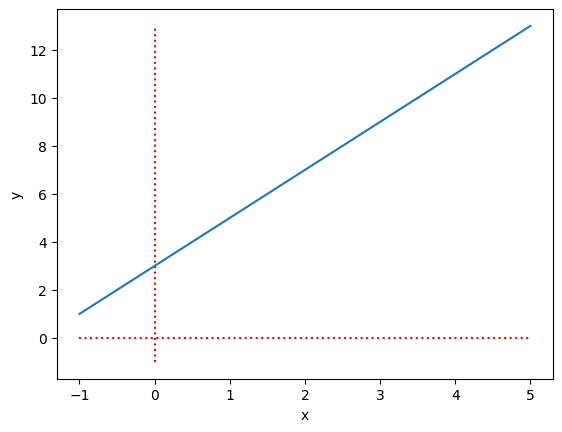

In [3]:
plt.plot([x.min(),x.max()],[0,0],'r:')
plt.plot([0,0],[min(x.min(),y.min()),max(y.max(),x.max())],'r:')
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Linear Regression Demo**

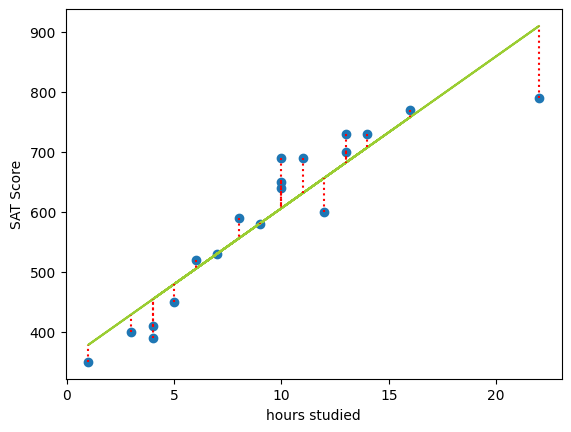

In [4]:
hours_studied = np.array([4, 9, 10, 14, 4, 7, 12, 22, 1, 3, 8, 5, 6, 10, 11, 16, 13, 13, 10])
sat_scores = np.array([390, 580, 650, 730, 410, 530, 600, 790, 350, 400, 590, 450, 520, 690, 690, 770, 700, 730, 640])

# Plot the data
plt.scatter(hours_studied, sat_scores)

# Fit a linear regression line
m, b = np.polyfit(hours_studied, sat_scores, 1)

# Plot the regression line
plt.plot(hours_studied, m * hours_studied + b,'yellowgreen')

for x,y in zip(hours_studied,sat_scores):
  plt.plot([x,x],[y,m*x+b],':r')
plt.xlabel('hours studied')
plt.ylabel('SAT Score')
# Show the plot
plt.show()

**Logistic Regression Demo**

In [5]:
work_experience= np.array([3, 4, 3, 5, 4, 6, 1, 4, 5, 1, 3, 5, 6, 4, 3,1, 4, 6])
gpa = np.array([4, 3.9, 3.3, 3.7, 3.9, 3.7, 2.3, 3.3, 3.3, 1.7, 2.7, 3.7, 3.7, 3.3, 3.3,3, 2.7,3.7])
admitted=np.array([1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1])

df=pd.DataFrame([work_experience,gpa,admitted],index=['work_exp','gpa','admitted']).T

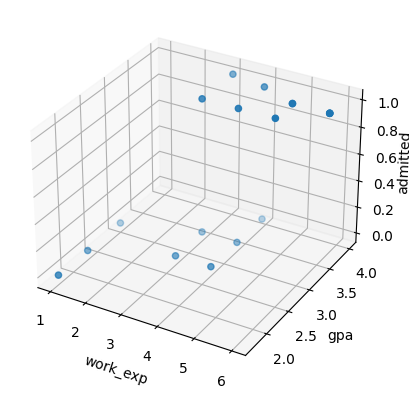

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df['work_exp'], df['gpa'], df['admitted'])

# Set the labels
ax.set_xlabel('work_exp')
ax.set_ylabel('gpa')
ax.set_zlabel('admitted')

ax.zaxis.labelpad=-0.7 # <- change the value here

# Show the plot
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
log_reg=LogisticRegression()
log_reg.fit(df[['work_exp','gpa']],df['admitted'])

LogisticRegression()

In [9]:
log_reg.intercept_

array([-6.02400089])

In [10]:
log_reg.coef_

array([[0.90907685, 0.84307008]])

In [11]:
prediction_Function=np.dot(df[['work_exp','gpa']],log_reg.coef_[0])+log_reg.intercept_[0]

In [13]:
log_reg.coef_[0]

array([0.90907685, 0.84307008])

In [14]:
log_reg.intercept_[0]

-6.0240008862716765

In [15]:
x=np.arange(5)
y=np.arange(5)*0.5

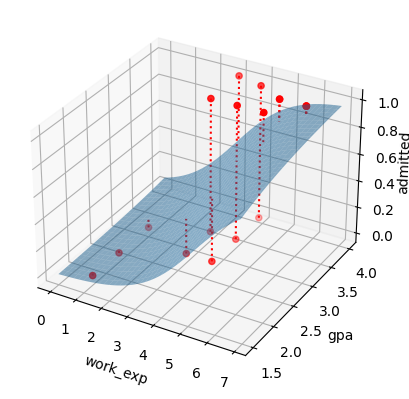

In [16]:
dx=0.1
dy=0.1
x = np.arange(0, 7, dx)
y = np.arange(1.5, 4+dy, dy)
X, Y = np.meshgrid(x, y)

coef_x,coef_y=log_reg.coef_[0]
Z=1/(1+np.exp(-(coef_x*X+coef_y*Y+log_reg.intercept_[0])))

df['prediction']=log_reg.predict_proba(df[['work_exp','gpa']])[:,1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z,alpha=0.5)

ax.set_xlabel('work_exp')
ax.set_ylabel('gpa')
ax.set_zlabel('admitted')
ax.scatter(df['work_exp'], df['gpa'], df['admitted'],color='red')

for i,row in df.iterrows():
  ax.plot([row.work_exp,row.work_exp],[row.gpa,row.gpa],[row.admitted,row.prediction],':r')



ax.zaxis.labelpad=-0.7 # <- change the value here

plt.show()